# Getting started with scikit-learn

In [86]:
import numpy as np

%matplotlib inline

In [87]:
from sklearn.datasets import load_iris

iris = load_iris()

type(iris)

sklearn.datasets.base.Bunch

In [88]:
x = iris.data
y = iris.target

## Viewing the distribution

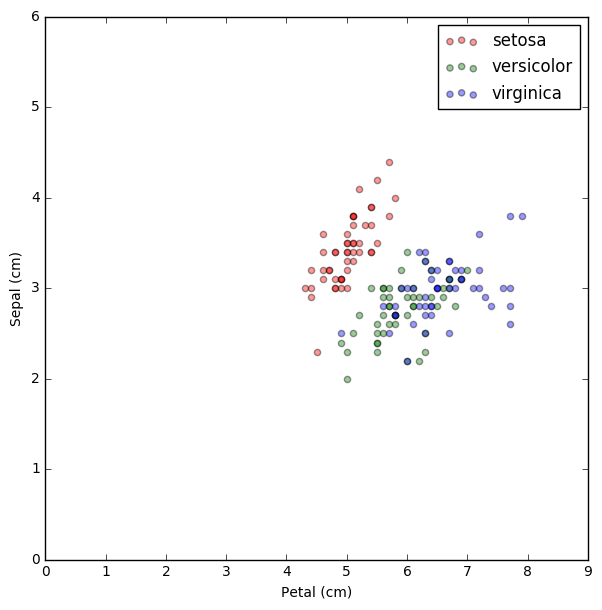

In [105]:
import matplotlib.pyplot as plt

colors = ['r', 'g', 'b']
plt.figure(figsize=(7, 7))

for i, label in enumerate(iris.target_names):
    plt.scatter(x[y == i][:, 0], x[y == i][:, 1], c=colors[i], alpha=0.4, label=label)
    
plt.xlabel('Petal (cm)')
plt.ylabel('Sepal (cm)')
plt.xlim(0, 9)
plt.ylim(0, 6)
plt.legend(loc='best');

## Using KNN Classification

In [78]:
from sklearn.neighbors import KNeighborsClassifier

knn1 = KNeighborsClassifier()
knn1.n_neighbors = 1

In [79]:
knn1.fit(x,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [80]:
knn1.predict([[3,5,4,2], [5,4,3,2]])

array([2, 1])

In [84]:
# Get probability of the input belonging to each class
knn1.predict_proba([[5,4,3,2]])

array([[ 0.,  1.,  0.]])

In [29]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x,y)

knn.predict([[3,5,4,2], [5,4,3,2]])

array([1, 1])

## Using Logistic Regression

In [30]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(x,y)

lr.predict([[3,5,4,2], [5,4,3,2]])

array([2, 0])

## Checking accuracy of models used

In [31]:
ypred1 = knn1.predict(x)
ypred2 = knn.predict(x)
ypred3 = lr.predict(x)

In [32]:
from sklearn import metrics
print("KNN with n=1: {}".format(metrics.accuracy_score(y, ypred1)))
print("KNN with n=5: {}".format(metrics.accuracy_score(y, ypred2)))
print("Logistic Regression: {}".format(metrics.accuracy_score(y, ypred3)))

KNN with n=1: 1.0
KNN with n=5: 0.9666666666666667
Logistic Regression: 0.96


## Doing a Train/Test split to improve testing accuracy

In [33]:
from sklearn.cross_validation import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.4, random_state=4)

In [34]:
logreg = LogisticRegression()
logreg.fit(xtrain, ytrain)

ypred = logreg.predict(xtest)
metrics.accuracy_score(ytest, ypred)

0.94999999999999996

In [35]:
knn5 = KNeighborsClassifier(n_neighbors=5)
knn5.fit(xtrain, ytrain)

ypred = knn5.predict(xtest)
metrics.accuracy_score(ytest, ypred)

0.96666666666666667

In [36]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(xtrain, ytrain)

ypred = knn.predict(xtest)
metrics.accuracy_score(ytest, ypred)

0.94999999999999996

## Find out optimal value for K

In [37]:
kvalues = range(1, 20)
accuracies = []

for k in kvalues:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(xtrain, ytrain)
    ypred = knn.predict(xtest)
    accuracies.append(metrics.accuracy_score(ytest, ypred))

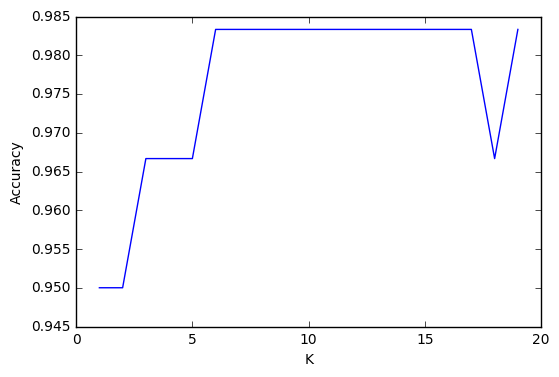

In [38]:
import matplotlib.pyplot as plt

plt.xlabel("K")
plt.ylabel("Accuracy")

plt.plot(kvalues, accuracies)

## Using K-fold cross-validation to improve testing accuracy

In [39]:
from sklearn.cross_validation import cross_val_score

In [41]:
knn = KNeighborsClassifier(n_neighbors=5)
print(scores.mean()) # The final accuracy is the average score

0.973333333333


In [42]:
kvalues = range(1, 20)
accuracies = []

for k in kvalues:
    c
    # Running a 10 fold cross-validation
    scores = cross_val_score(knn, x, y, cv=10, scoring='accuracy')
    accuracies.append(scores.mean())

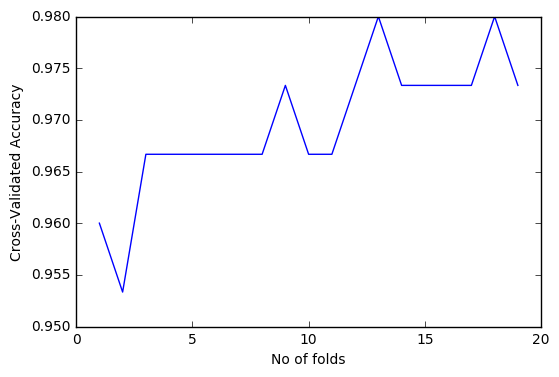

In [43]:
import matplotlib.pyplot as plt

plt.xlabel("No of folds")
plt.ylabel("Cross-Validated Accuracy")

plt.plot(kvalues, accuracies)

## Plotting Learning Curve

Learning Curve tells us how much benefit adding more training data is, for the estimator.

It can also be used to check the estimator for Bias/Variance.

In [71]:
from sklearn.model_selection import learning_curve

knn = KNeighborsClassifier(n_neighbors=5)
train_sizes, train_scores, validation_scores = learning_curve(knn, x, y, cv=10)

In [72]:
train_scores_mean = np.mean(train_scores, axis=1)
validation_scores_mean = np.mean(validation_scores, axis=1)

train_scores_std = np.std(train_scores, axis=1)
validation_scores_std = np.std(validation_scores, axis=1)

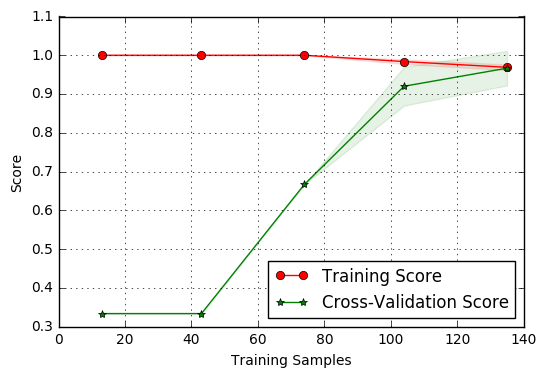

In [74]:
import matplotlib.pyplot as plt

plt.xlabel("Training Samples")
plt.ylabel("Score")
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes, validation_scores_mean - validation_scores_std,
                 validation_scores_mean + validation_scores_std, alpha=0.1, color="g")

plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label="Training Score")
plt.plot(train_sizes, test_scores_mean, '*-', color='g', label="Cross-Validation Score")

plt.legend(loc="best")

### Things to observe

- If the training and validation scores converge to a very low value as the size of the training set increases, then there won't be any benefit of adding more training data.

- If the training score is (much) greater than the validation score for the max no of training samples, then adding mroe data could increase generalization.

# Misc

### Using Decision Tree Classifier

In [114]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth=4)
tree.fit(xtrain, ytrain)
treeviz(tr)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

### Visualizing the Tree

In [125]:
from io import StringIO
from sklearn.tree import export_graphviz


def treeviz(t): 
    dot_data = StringIO()  
    export_graphviz(t, out_file=dot_data,  
                    feature_names=['petal (cm)', 'sepal (cm)'],  
                    class_names=iris.target_names,  
                    filled=True, rounded=True)  
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
    return Image(graph.create_png())  

In [126]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth=4)
tree.fit(xtrain, ytrain)
treeviz(tree)

IndexError: list index out of range